In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
import mne

In [8]:
# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=250, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=250, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=250, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=250, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    print(low, high)
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

In [9]:


# List of file paths
files = [
        '../dataset/OpenBCI-RAW-2023-10-24_15-07-27.txt',
        '../dataset/OpenBCI-RAW-2023-10-31_15-27-39.txt',
        '../dataset/OpenBCI-RAW-2023-10-31_15-30-47.txt',
        '../dataset/OpenBCI-RAW-2023-11-28_15-44-34.txt',
        '../dataset/OpenBCI-RAW-2023-11-28_15-48-59.txt',
        '../dataset/OpenBCI-RAW-2023-11-28_15-50-35.txt',
        '../dataset/OpenBCI-RAW-2023-11-28_15-53-44.txt'
]

# Load data from each file into a NumPy array and concatenate them
data = np.concatenate([np.loadtxt(file, dtype=float, delimiter=',', skiprows=5, usecols=range(1, 9)) for file in files])

# Now, 'data' contains the concatenated data from all files

np.save('../data.npy', data)

In [10]:
print(data.shape)

(997222, 8)


In [11]:
def print_graphs(X):
    for i in range(X.shape[1]):
        plt.plot(X[:,i])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(X.shape[1]):
        plt.psd(X[:,i], Fs=250)
    plt.title('Domínio da frequência')
    plt.show()

(8013600,)


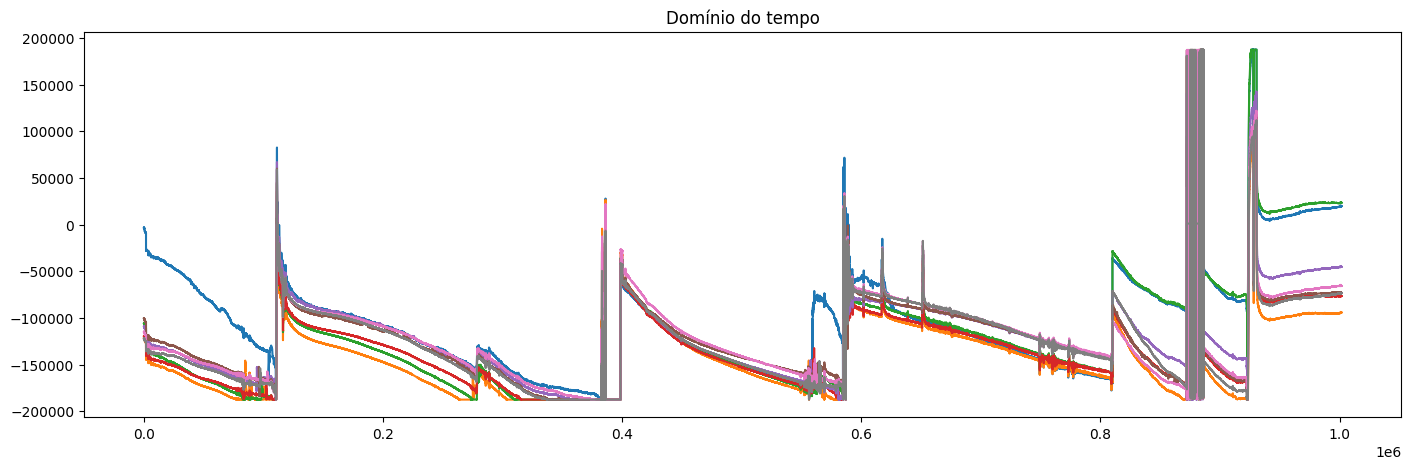

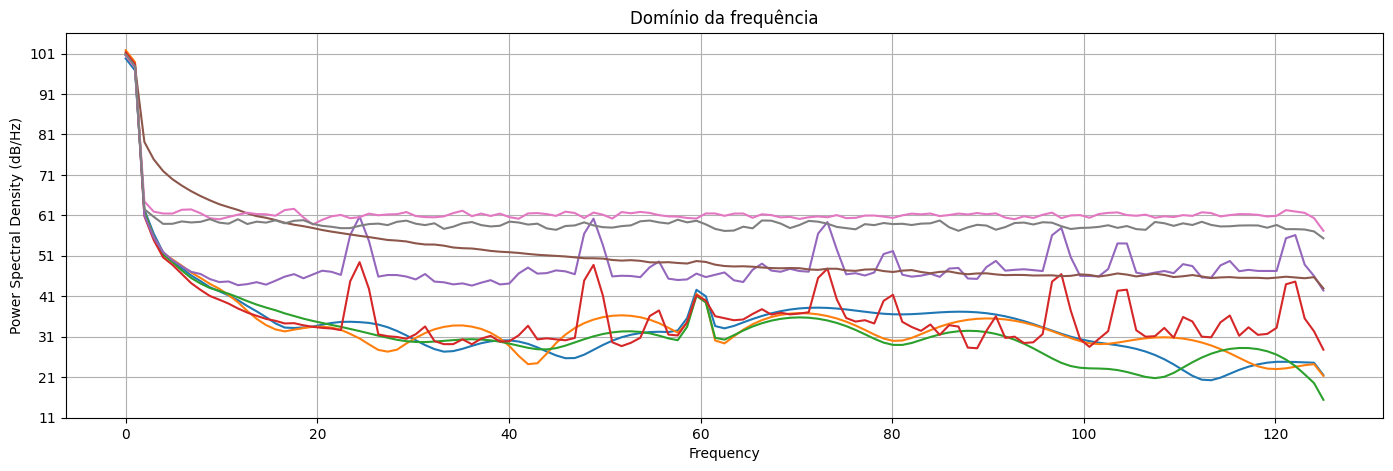

In [12]:


# Apresentação dos dados sem aplicação dos filtros.

data = np.load('data.npy')
print(data.flatten().shape)

rcParams['figure.figsize'] = [17., 5.]
print_graphs(data)



0.472 0.488


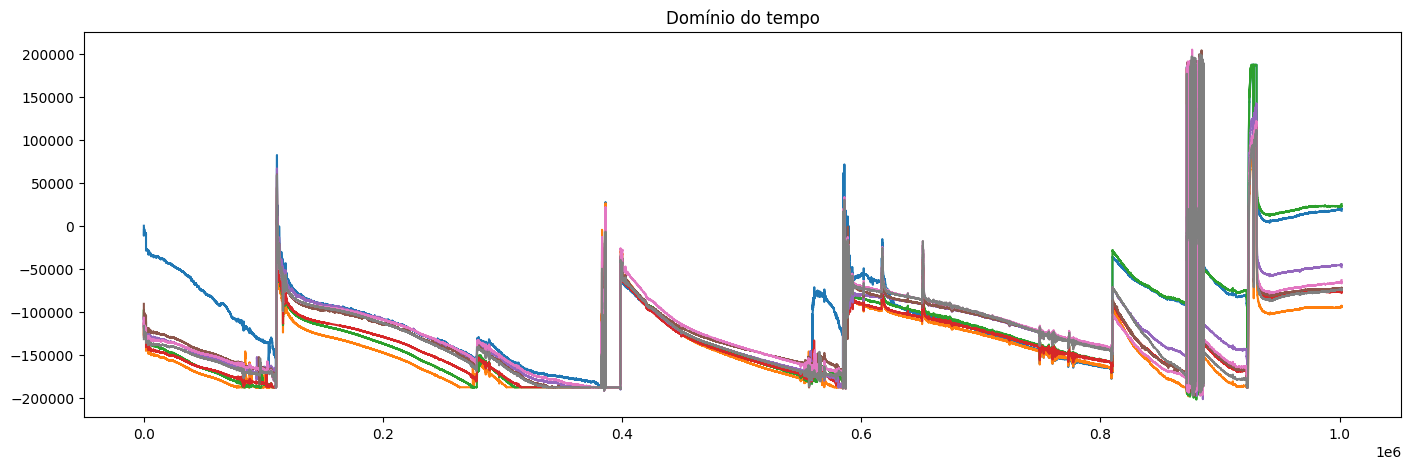

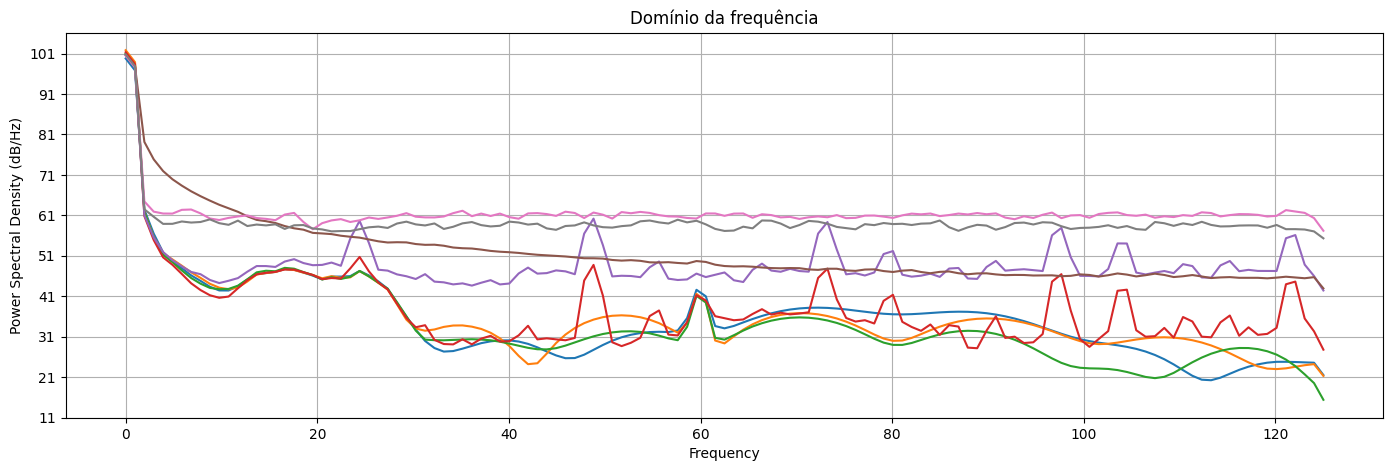

In [13]:
data_filtered = butter_notch(data.flatten(), 60)
data_filtered = data_filtered.reshape(int(data_filtered.shape[0] / 8), 8)
print_graphs(data_filtered)

In [14]:
n_samples = data.shape[0]  # Total number of samples in the data
n_channels = data.shape[1]  # Total number of channels in the data

# Calculate the number of samples that are evenly divisible by the number of channels
n_samples_trimmed = (n_samples // n_channels) * n_channels
print("Trimmed number of samples:", n_samples_trimmed)

# Trim the data array to have a length that is evenly divisible by the number of channels
data = data[:n_samples_trimmed]

# Reshape the data array to match the number of channels specified in the 'info' object
data = data.reshape((-1, n_channels))

# Create channel names and types
ch_names = [f'EEG {i+1}' for i in range(n_channels)]
ch_types = ['eeg'] * n_channels
sfreq = 250

# Create an Info object
info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

# Create an MNE RawArray object
mne_data = mne.io.RawArray(data.T, info)

# Print the shape of the data array and the created Info object
print("Data shape after trimming and reshaping:", data.shape)
print("Info object:", info)

Trimmed number of samples: 1001696
Creating RawArray with float64 data, n_channels=8, n_times=1001696
    Range : 0 ... 1001695 =      0.000 ...  4006.780 secs
Ready.
Data shape after trimming and reshaping: (1001696, 8)
Info object: <Info | 7 non-empty values
 bads: []
 ch_names: EEG 1, EEG 2, EEG 3, EEG 4, EEG 5, EEG 6, EEG 7, EEG 8
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)


/tmp/ipykernel_7891/496470867.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd.plot()
/home/alunos/a2149435/Documents/bneeeurd/Reconhecimento-de-padr-es/reconhecimento_padroes/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


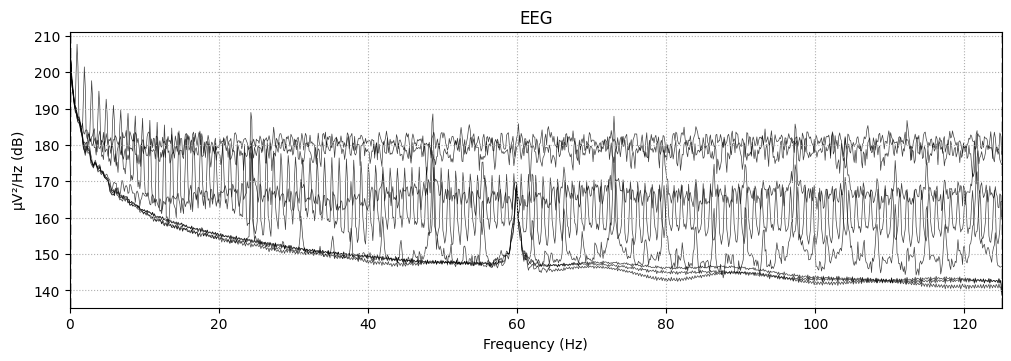

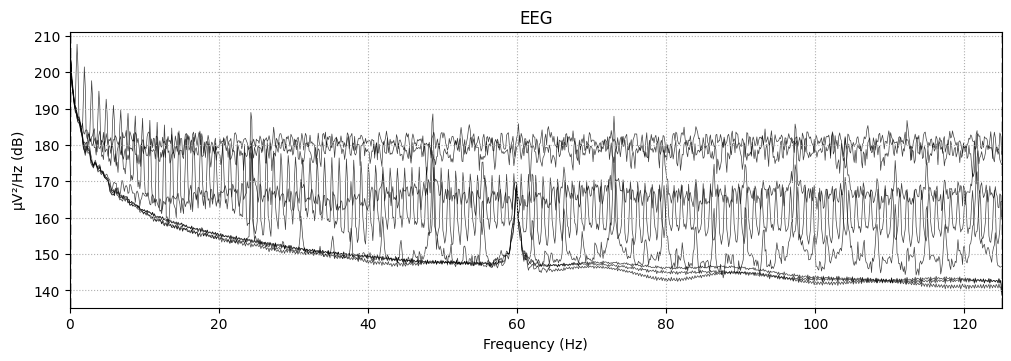

In [15]:
# Assuming mne_data is your MNE RawArray object
psd = mne_data.compute_psd()

# Plot the PSD with a specific color
psd.plot()

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband e

/tmp/ipykernel_7891/1251379932.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mne_data_filtered.compute_psd().plot()
/home/alunos/a2149435/Documents/bneeeurd/Reconhecimento-de-padr-es/reconhecimento_padroes/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


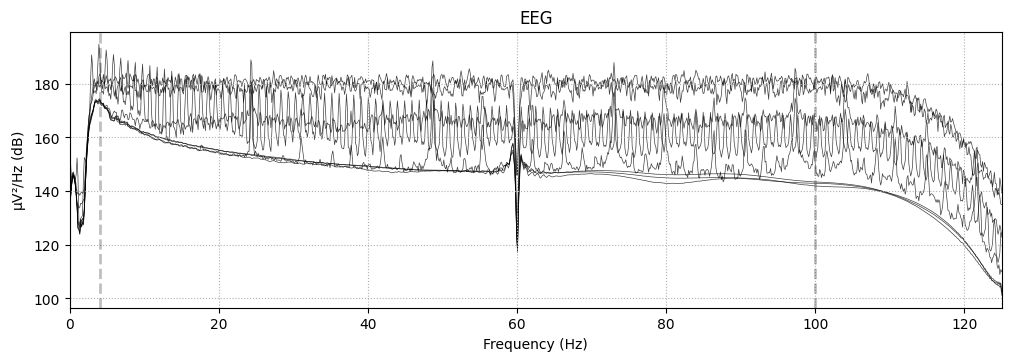

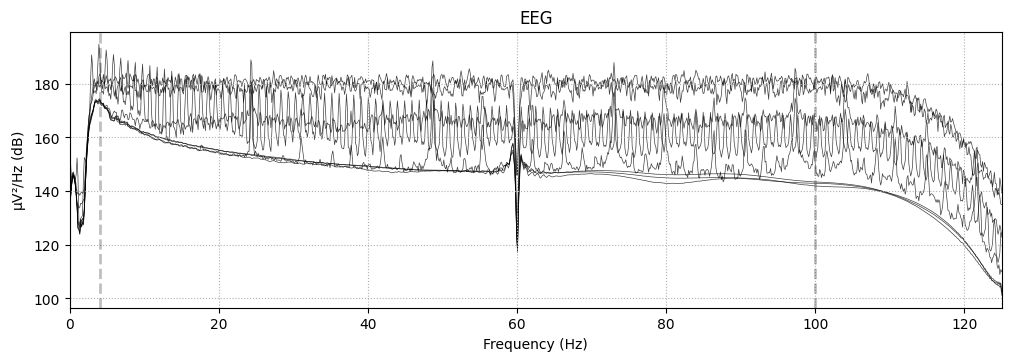

In [16]:
mne_data_filtered = mne_data.copy()
mne_data_filtered = mne_data_filtered.notch_filter(freqs=60)
mne_data_filtered = mne_data_filtered.filter(l_freq=4, h_freq=100)
mne_data_filtered.compute_psd().plot()

In [17]:
mne_data_filtered.save('../data_filtered.fif', overwrite=True)

Overwriting existing file.
Writing /home/alunos/a2149435/Documents/bneeeurd/Reconhecimento-de-padr-es/venv/../data_filtered.fif


/tmp/ipykernel_7891/2816160230.py:1: RuntimeWarning: This filename (/home/alunos/a2149435/Documents/bneeeurd/Reconhecimento-de-padr-es/venv/../data_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data_filtered.save('../data_filtered.fif', overwrite=True)


Closing /home/alunos/a2149435/Documents/bneeeurd/Reconhecimento-de-padr-es/venv/../data_filtered.fif
[done]


In [18]:
# Defina o intervalo de tempo que você deseja extrair (em segundos)
start, stop = 10, 20  # Isso extrairá os dados entre 10 e 20 segundos

# Use o método crop para extrair o intervalo de tempo desejado
mne_data_filtered.filter(l_freq=13, h_freq=30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 255 samples (1.020 s)



Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,13.00 Hz
Lowpass,30.00 Hz


In [19]:

channels = mne_data_filtered.info['ch_names']

# Print the channels
for channel in channels:
    print(channel)

EEG 1
EEG 2
EEG 3
EEG 4
EEG 5
EEG 6
EEG 7
EEG 8


In [20]:
# Start with the original data
mne_data_original = mne_data.copy()

# Pick a specific channel
mne_data_original.pick_channels(['EEG 4'])

# Filter the data
mne_data_original.filter(l_freq=13, h_freq=30)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 255 samples (1.020 s)



Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,1 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,13.00 Hz
Lowpass,30.00 Hz
